### About this notebook

This notebook now calls the reusable module `models/activity_timing.py`.
The module performs:
- impact trading day mapping (US/Eastern, 4pm rule)
- daily aggregation of post counts
- LOWESS smoothing and thresholding
- spike feature engineering
- optional price overlay plotting

Spike features are computed inside `models/activity_timing.py`:
- spike_presence (0/1)
- spike_intensity (float)

/Users/hwang-yejin/Desktop/Summer1/Proposal/code_cleaning/Financial Time Series Forecasting with Deep Learning Models and Social Media Sentiment/models/activity_timing.py:76: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt_utc = pd.to_datetime(df['datetime'], utc=True)
/Users/hwang-yejin/Desktop/Summer1/Proposal/code_cleaning/Financial Time Series Forecasting with Deep Learning Models and Social Media Sentiment/models/activity_timing.py:154: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


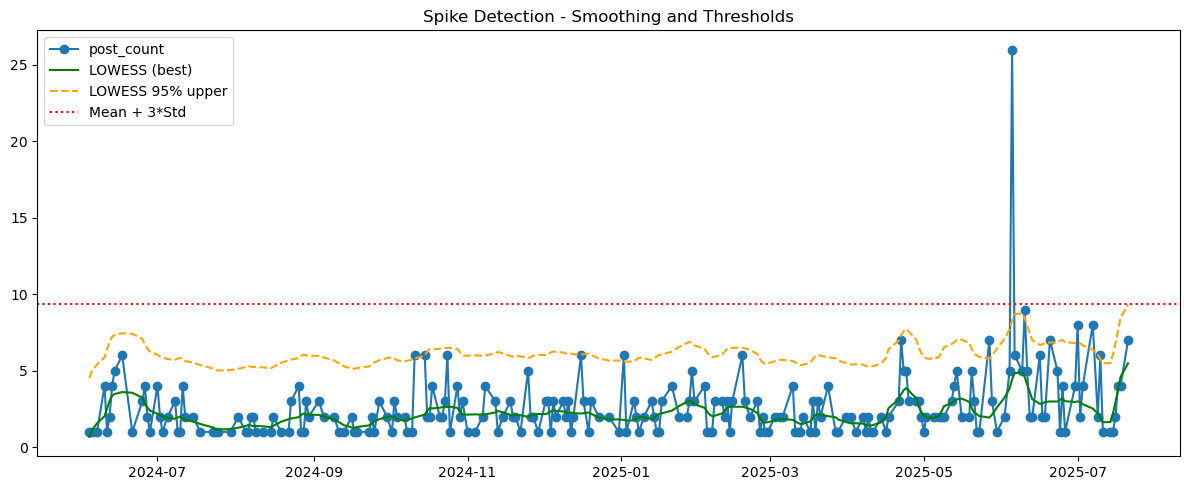

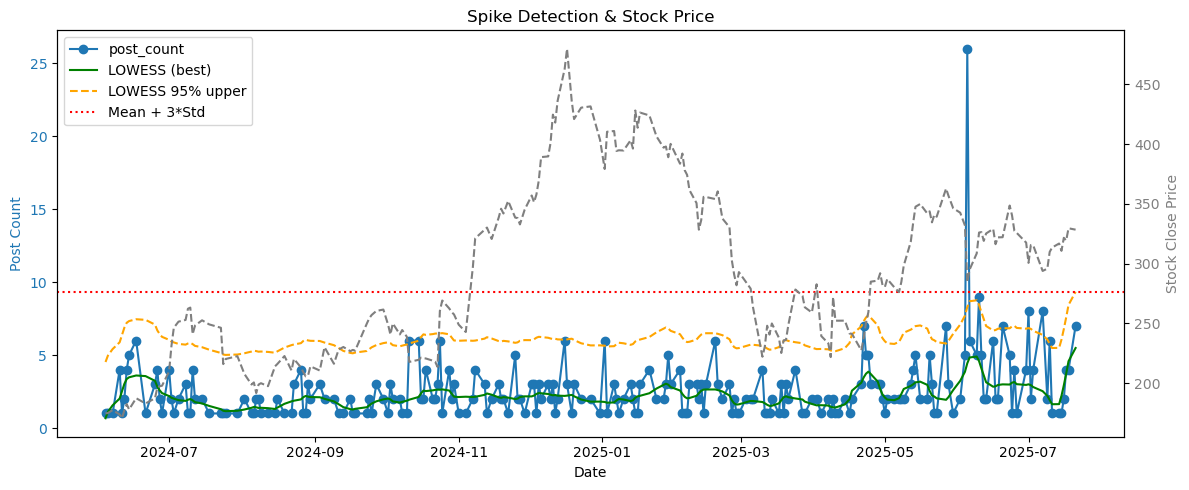

,impact_trading_day,post_count,smoothed,spike_presence,spike_intensity,loess_upper
0,2024-06-04,1,0.671075,0,0.0,4.527232
1,2024-06-05,1,1.106896,0,0.0,4.963053
2,2024-06-07,1,1.556785,0,0.0,5.412942
3,2024-06-10,4,2.023736,0,0.0,5.879892
4,2024-06-11,1,2.515259,0,0.0,6.371415


In [1]:
# This notebook now delegates logic to models/activity_timing.py
from pathlib import Path
from datetime import datetime

import pandas as pd

# Allow running the module when executing the notebook from notebooks/
import sys
cwd = Path.cwd().resolve()
PROJECT_ROOT = cwd.parent if cwd.name == 'notebooks' else cwd
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from models.activity_timing import run_activity_timing

INPUT_CSV = PROJECT_ROOT / 'data' / 'interim' / 'activitiy recognition' / 'tesla_sentiment.csv'
OUTPUT_CSV = PROJECT_ROOT / 'data' / 'interim' / 'activitiy recognition' / 'spike_data.csv'

result = run_activity_timing(
    input_csv=str(INPUT_CSV),
    output_csv=str(OUTPUT_CSV),
    ticker='TSLA',
    show_plots=True,
)

result.head()


Spike features are computed inside `models/activity_timing.py`:
- spike_presence (0/1)
- spike_intensity (float)

In [ ]:
# Moved to models/activity_timing.py
# This cell is intentionally left minimal to avoid duplication.